**(Q)** Nghiên cứu phương pháp cụ thể cho việc học có giám sát. Đây có thể là một phương pháp hồi quy hoặc phân loại và là phương pháp phải có ít nhất một siêu tham số có thể điều chỉnh được. Một trong số đó sử dụng phương pháp: hồi quy ridge, hồi quy k-nearest neighbour, hồi quy tree( cây quyết định), hồi quy regularized logistic(logistic được điều chỉnh), random forest(Rừng ngẫu nhiên)...

#### 1. **Phần Miêu Tả**

**(A)** Tôi chọn thuật toán **Phân loại K-Nearest Neighbour** dùng **python**. Học có giám sát trong việc phân loại với đề tài *Breast Cancer(Ung Thư Vú)*, cụ thể dự đoán ung thư lành tính hay ác tính **Breast Cancer dataset (Bộ dữ liệu ung thư vú)**.

#### **1.1 Giới thiệu Tập dữ liệu**
- Tập dữ liệu Ung thư vú từ Kho lưu trữ UCI Machine Learning là tập dữ liệu phân loại chứa các bản ghi về các chỉ số gây ung thư vú.
  
- Tập dữ liệu chứa hai lớp(classes), **benign(lành tính)** & **malignant(ác tính)**.

|Đặc điểm | Thuộc tính | Số trường hợp | Số thuộc tính |
| --- | --- | --- | --- |
| Multivariate | Real | 569 | 32 |

- Kích thước của tập dữ liệu là `123kb`.

#### **1.2 Thuật Toán K-Nearest Neighbours**

**Sơ lược về K-NN?**

K-Nearest Neighbor (K-NN) là một ví dụ  về thuật toán kinh điển về Machine Learning học có giám sát cho đề tài dùng hồi quy và phân loại.


K-NN sử dụng dữ liệu được cung cấp và phân loại các điểm dữ liệu mới dựa trên`similarity measures` giữa điểm dữ liệu mới và các điểm dữ liệu trong tập huấn luyện.
Không giống như phương pháp học có giám sát truyền thống `KNN là unique với 2 properties`:
- Lazy Learning
  
- Phương pháp Non-parametric(phi tham số)

**a. Lazy Learning**

K-NN là thuật toán lazy learning vì nó không học hàm phân biệt từ dữ liệu huấn luyện được cung cấp. Thay vào đó `memorizes(ghi nhớ)` dữ liệu huấn luyện và sau đó sử dụng nó để dự đoán đầu ra. Việc khái quát hóa dữ liệu huấn luyện bị trì hoãn cho đến khi truy vấn được thực hiện.

**b. Phương pháp Non-parametric(phi tham số)**

`Các tham số mô hình được tăng lên khi huấn luyện`. Cần giữ lại tất cả dữ liệu huấn luyện để dự đoán trong tương lai.

Nó không giống với trình phân loại tham số (ví dụ như cây quyết định, hồi quy tuyến tính, logistic), trong đó, sau khi tìm thấy các tham số tối ưu, ta có thể sử dụng nó để dự đoán.

---

**Thực hiện và dự đoán của K-NN**

* K-NN (k-Nearest Neighbor) là thuật toán so sánh giữa một truy vấn và tất cả các điểm dữ liệu trong tập huấn luyện, và sau đó `Gán nhãn cho nhãn phổ biến`.
* Khoảng cách được tính bằng cách sử dụng các độ đo tương đồng `similarity measures(các độ đo tương đồng)`(như khoảng cách Euclidean hoặc khoảng cách Manhattan), và sau đó dựa vào sự tương đồng, thuật toán phân loại các điểm dữ liệu mới.

**Loại hình vấn đề mà KNN được sử dụng?**

* K-NN  có thể được sử dụng để giải quyết *các vấn đề phân loại và hồi quy.*
* Sử dụng cho *non-linear data(dữ liệu phi tuyến tính)* (mối quan hệ phi tuyến giữa biến phụ thuộc và biến độc lập).
* Phân tích *ad-hoc analysis* trên dữ liệu, có các tham số có thể điều chỉnh một cách đơn giản.
* *Outlier detection(Phát hiện các giá trị ngoại lệ)* trên các tập dữ liệu lớn(datasets).


## **1. Importing các thư viện cần thiết**

In [72]:
# Phân Tích Dữ Liệu
import pandas as pd
import numpy as np

# Phân Tích Thống Kê
import scipy.stats as stats

# Trực Quan Hóa Dữ Liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

### **Nhập tập dữ liệu**
Note: Phải kiểm tra đường dẫn thư mục nơi tập dữ liệu được lưu trữ và thay đổi tùy theo.

In [73]:
# Đường dẫn đầy đủ đến tập tin trên Google Drive
file_path = 'C:\Hoc_May\DoAnCN\data_BreastCancer.csv'

# Đọc tập tin CSV
pd.set_option('display.max_columns', None)
breast_cancer_data = pd.read_csv(file_path)

# Hiển thị ba dòng đầu tiên
breast_cancer_data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


## **2. Khám Phá Dữ Liệu**

**Có bao nhiêu đặc điểm (features) trong tập dữ liệu này?**

In [74]:
# Các Đặc Điểm trong Tập Dữ Liệu
print("Các đặc điểm trong tập dữ liệu: \n{cols} \n\n Số lượng đặc điểm trong tập dữ liệu là {num_features}"
.format(cols = list(breast_cancer_data.columns), num_features = len(breast_cancer_data.columns)))

Các đặc điểm trong tập dữ liệu: 
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'] 

 Số lượng đặc điểm trong tập dữ liệu là 33


**Mô tả về tập dữ liệu**

Bảng tổng hợp thống kê mô tả cho tập dữ liệu Ung thư vú (Breast Cancer) (Chẩn Đoán).

In [75]:
# Mô Tả Tập Dữ Liệu
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Thông Tin về DataFrame**
Thông tin về một DataFrame bao gồm kiểu dữ liệu của chỉ mục (index) và cột, giá trị không rỗng.

**Mỗi biến trong số chúng có kiểu dữ liệu gì (ví dụ: biến phân loại, biến thứ tự, biến liên tục, biến nhị phân, v.v.)?**

In [76]:
# Thông Tin về DataFrame
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Từ mô tả ở trên, có thể thấy *hầu hết các đặc điểm trong tập dữ liệu* có kiểu dữ liệu `float64`, trong khi cột "id" có kiểu dữ liệu `int64` và cột "diagnosis" có kiểu dữ liệu `object`.

In [77]:
breast_cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Cột `diagnosis` là một loại dữ liệu `phân loại` vì nó chứa các giá trị `B` - Lành tính và `M` - Ác tính.

In [78]:
df_A = breast_cancer_data[['id','diagnosis','Unnamed: 32']]

df_A.head(3)

,id,diagnosis,Unnamed: 32
0,842302,M,NaN
1,842517,M,NaN
2,84300903,M,NaN


In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

In [80]:
print("Số giá trị Null trong cột 'Unnamed: 32' là", df_A['Unnamed: 32'].isnull().sum())

Số giá trị Null trong cột 'Unnamed: 32' là 569


**Lưu Ý:** Các cột sau cần xem xét:

* `id` - không thể được sử dụng cho mục đích phân loại
* `diagnosis` - class labels(nhãn lớp)
* `Unnamed: 32` - Bao gồm giá trị NaN, do đó không hữu ích cho việc phân loại

Vì vậy, *loại bỏ* các cột trên khỏi tập dữ liệu.

In [81]:
# Nhãn (labels) là cột "diagnosis"
labels_data = breast_cancer_data['diagnosis']

# Danh sách cột cần loại bỏ
danh_sach_loai_bo = ['Unnamed: 32', 'id', 'diagnosis']

# Các đặc điểm (features) là các cột còn lại
features_data = breast_cancer_data.drop(danh_sach_loai_bo, axis=1)

features_data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## **3. Trực Quan Hóa Dữ Liệu & Lựa Chọn Đặc Điểm**

Số lượng Lành Tính: 357
Số lượng Ác tính: 212


Text(0, 0.5, 'Số Lượng')

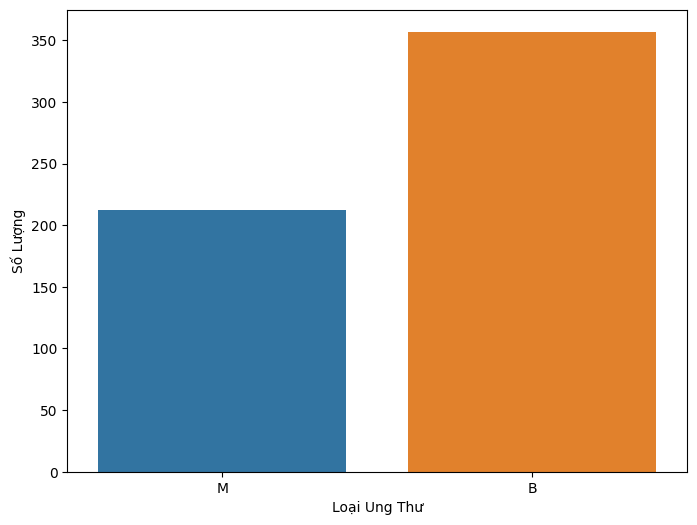

In [82]:
# Hiển thị số lượng "Lành Tính " và "Ác Tính"
benign_count = labels_data.value_counts()['B']
malignant_count = labels_data.value_counts()['M']
print("Số lượng Lành Tính: {benign_count}\nSố lượng Ác tính: {malignant_count}"
.format(benign_count = labels_data.value_counts()[0], malignant_count = labels_data.value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(x=labels_data, order=['M', 'B'])
plt.xlabel("Loại Ung Thư")
plt.ylabel("Số Lượng")

**Lưu ý:** Có thể thấy rằng `tập dữ liệu không cân bằng`, vì số mẫu Lành tính lớn hơn số mẫu Ác tính, vì vậy `cần cân bằng tập dữ liệu`.

#### **3.1 Chuẩn hóa (Normalization)**

* Chuẩn hóa là một quy trình trong đó các giá trị được dịch chuyển và tỷ lệ giữa 0 và 1.

* Còn được gọi là *Min-Max Scaling*.

* Nó được sử dụng để chuẩn hóa dữ liệu sao cho các đặc điểm có một tỷ lệ tương tự.

$$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Trong đó $X_{min}$ là giá trị tối thiểu và $X_{max}$ là giá trị tối đa của đặc điểm.

* Chuẩn hóa là phương pháp tối ưu khi tập dữ liệu không có *Phân phối Gaussian*. Hữu ích cho các thuật toán như K-NN *mà không giả định bất kỳ phân phối nào*.

In [83]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một đối tượng của StandardScaler
scaler = MinMaxScaler()

# Khớp (fit) dữ liệu của dataframe với scaler
print(scaler.fit(features_data))

MinMaxScaler()


In [84]:
# Chuyển đổi dataframe
features_scaled = scaler.transform(features_data)

# Chuyển đổi mảng đã được chuẩn hóa thành dataframe
features_scaled = pd.DataFrame(features_scaled, columns=features_data.columns)

features_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**Biểu đồ Violin theo nhóm 10 đặc điểm** để quan sát phân phối dữ liệu số => so sánh phân phối giữa nhiều nhóm

**a. 10 Đặc Điểm Đầu Tiên**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

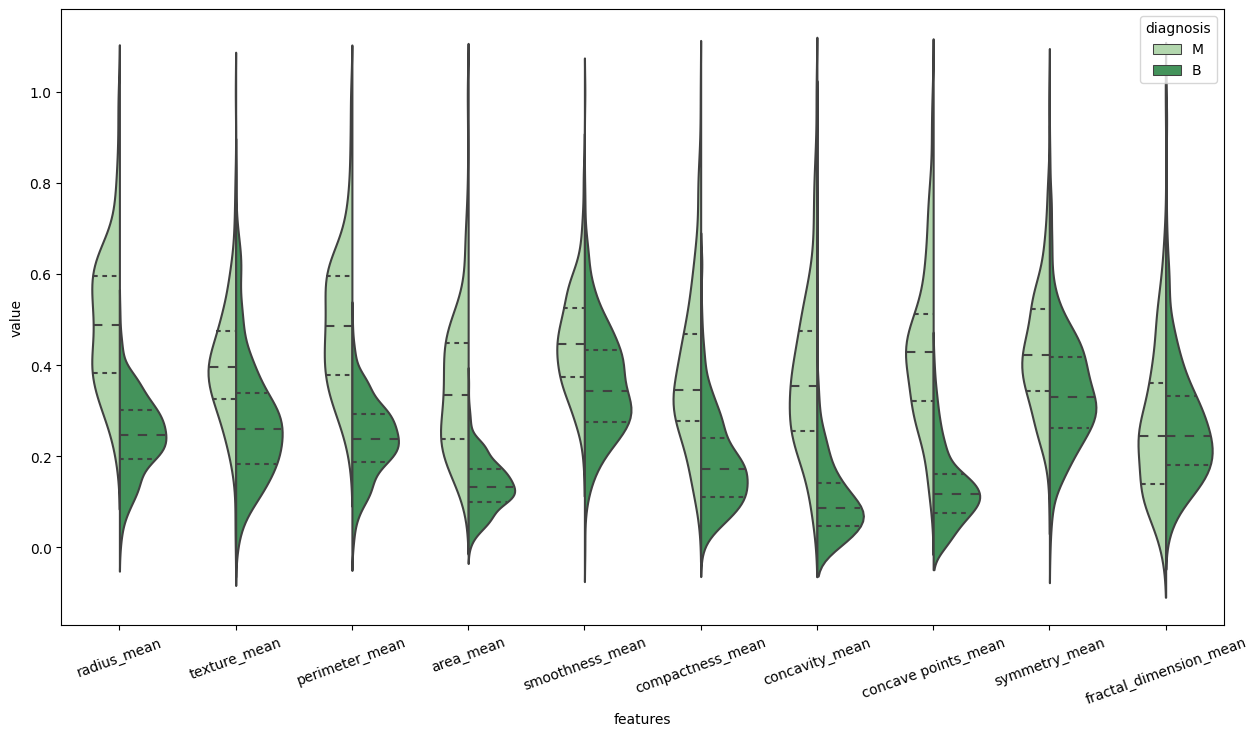

In [85]:
# Mười Đặc Điểm Đầu Tiên
violin_data = pd.concat([features_scaled.iloc[:,0:10], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Greens", hue="diagnosis",
    split=True, inner="quart", scale="count")

plt.xticks(rotation=20)

Từ biểu đồ trên, thấy rằng một số đặc điểm như `radius_mean` và `texture_mean` có phân phối tương tự, trong đó giá trị trung bình của Lành tính được tách biệt khỏi Ác tính. Những đặc điểm như vậy có thể phù hợp cho việc phân loại.

Trong khi đó, đặc điểm `fractal_dimension_mean` có giá trị trung bình của lành tính và Ác tính gần như giống nhau, do đó không phù hợp để sử dụng đặc điểm này cho việc phân loại.

**b. Mười Đặc Điểm Tiếp Theo**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

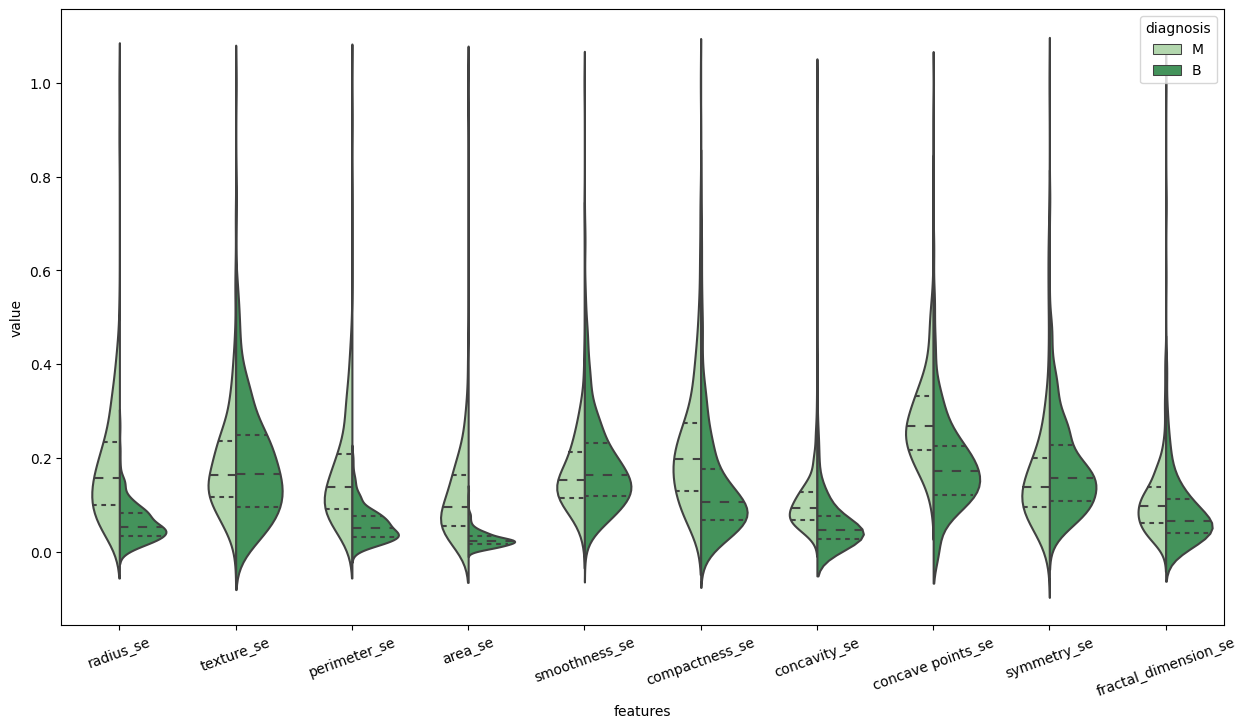

In [86]:
violin_data = pd.concat([features_scaled.iloc[:,10:20], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Greens", hue="diagnosis",
    split=True, inner="quart", scale="count")

plt.xticks(rotation=20)

**c. Các Đặc Điểm Còn Lại**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

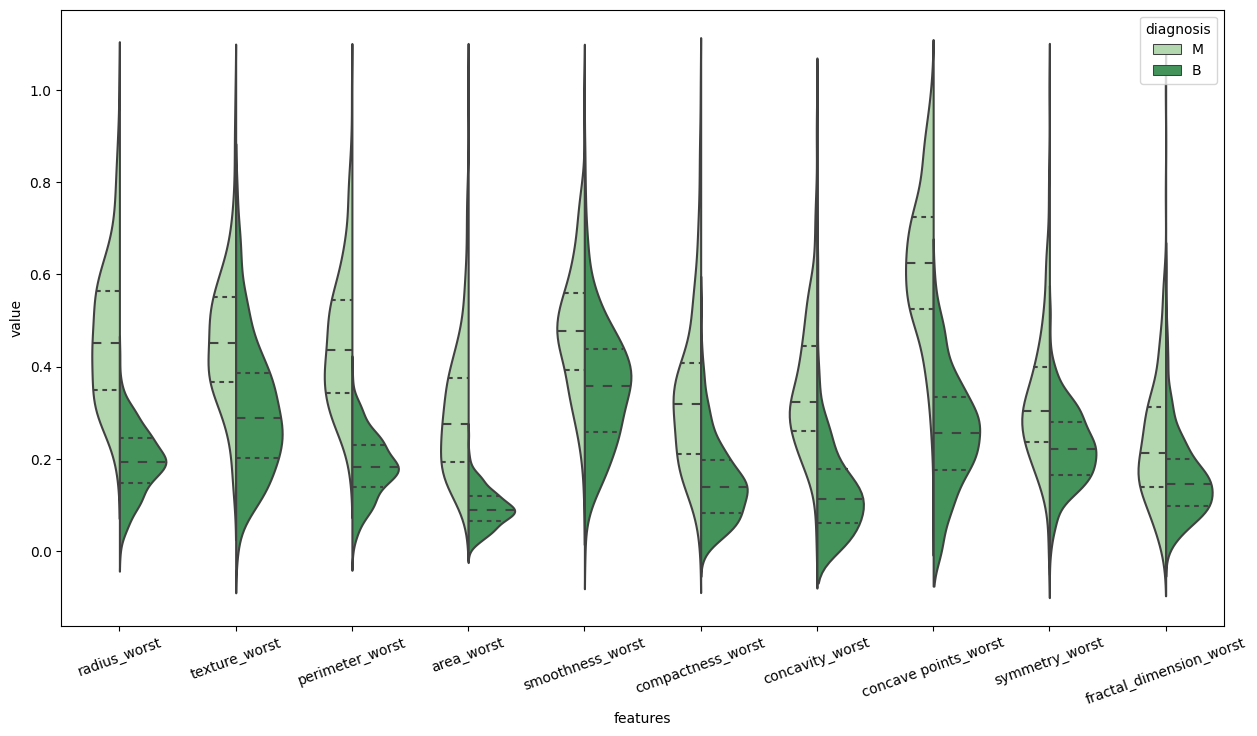

In [87]:
violin_data = pd.concat([features_scaled.iloc[:,20:31], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Greens", hue="diagnosis",
    split=True, inner="quart", scale="count")

plt.xticks(rotation=20)

**Lưu ý:** Có thể thấy rằng các đặc điểm `concavity_worst` và `concave point_worst` có vẻ giống nhau, để tốt hơn về phân phối (nếu các đặc điểm có *mối tương quan* với nhau) một trong các đặc điểm có thể bị loại bỏ.

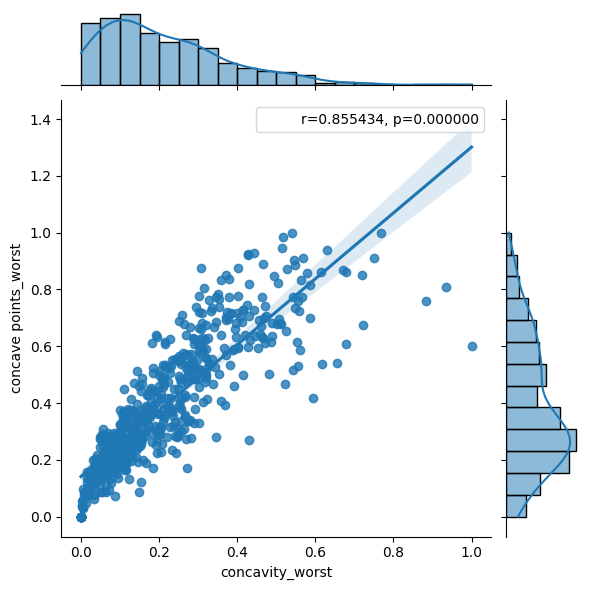

In [88]:
# Biểu đồ Jointplot cho hai đặc điểm
graph = sns.jointplot(x="concavity_worst", y="concave points_worst", data=features_scaled, kind="reg")

r, p = stats.pearsonr(x=features_scaled['concavity_worst'], y=features_scaled['concave points_worst'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

Từ Biểu đồ Joint Plot trên, phân phối dữ liệu của các đặc điểm trên khá tương tự. Giá trị `Pearsonr` là 0.85, gần bằng 1.0, cho thấy sự tương quan mạnh mẽ giữa các đặc điểm `concavity_worst` và `concave point_worst`. Do đó, có thể loại bỏ đặc điểm `concavity_worst` và `concave point_worst` khỏi tập dữ liệu vì chúng *tương quan với nhau*.

`Hệ số tương quan Pearson` đo lường mối quan hệ tuyến tính giữa hai biến, giá trị dao động từ -1 đến 1, với ý nghĩa như sau:
- -1 có nghĩa là hai biến tương quan âm
- 0 có nghĩa là các biến không tương quan
- +1 có nghĩa là hai biến tương quan dương

**Tương quan giữa tất cả các đặc điểm trong tập dữ liệu**

<Axes: >

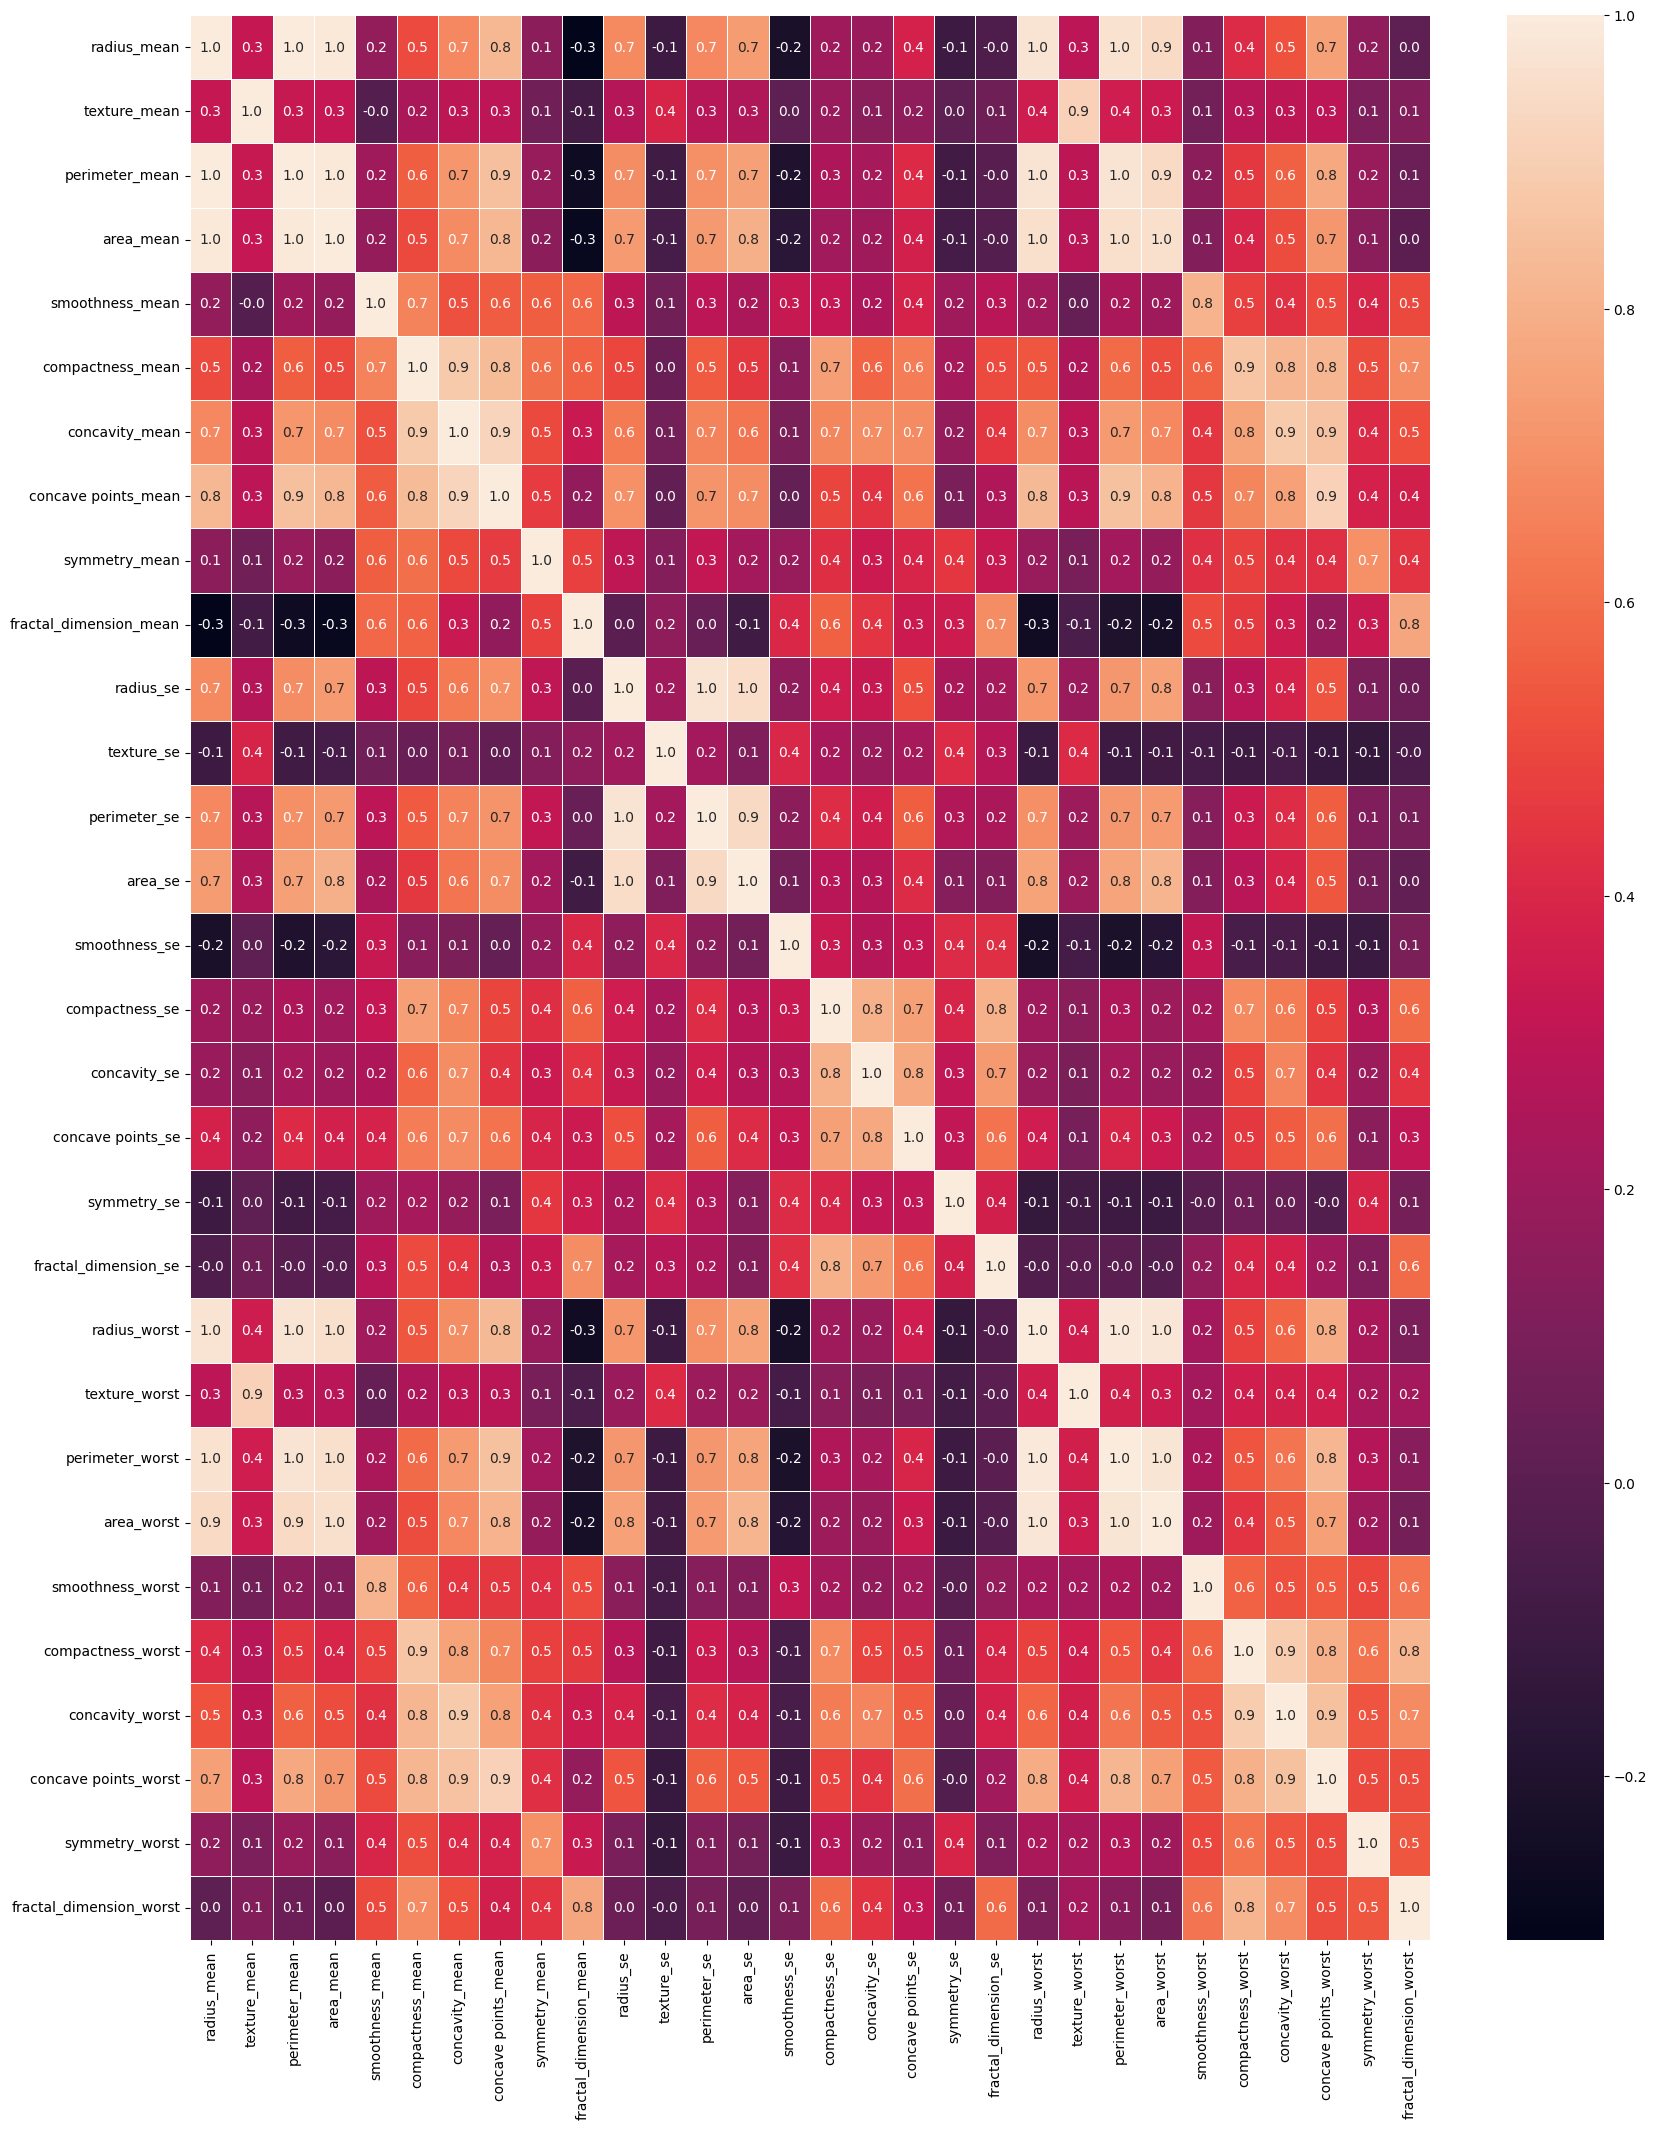

In [89]:
# Biểu đồ Tương quan bằng Heatmap
f,ax = plt.subplots(figsize=(20,25))
sns.heatmap(features_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Từ biểu đồ *Heat Map Tương quan* ở trên, có thể thấy rằng các đặc điểm `radius_mean`, `perimeter_mean`, `area_mean` có mối tương quan với nhau.

Tương tự, các đặc điểm `compactness_mean`, `concavity_mean`, `concave points_mean` cũng có mối tương quan với nhau.

<Axes: xlabel='features', ylabel='value'>

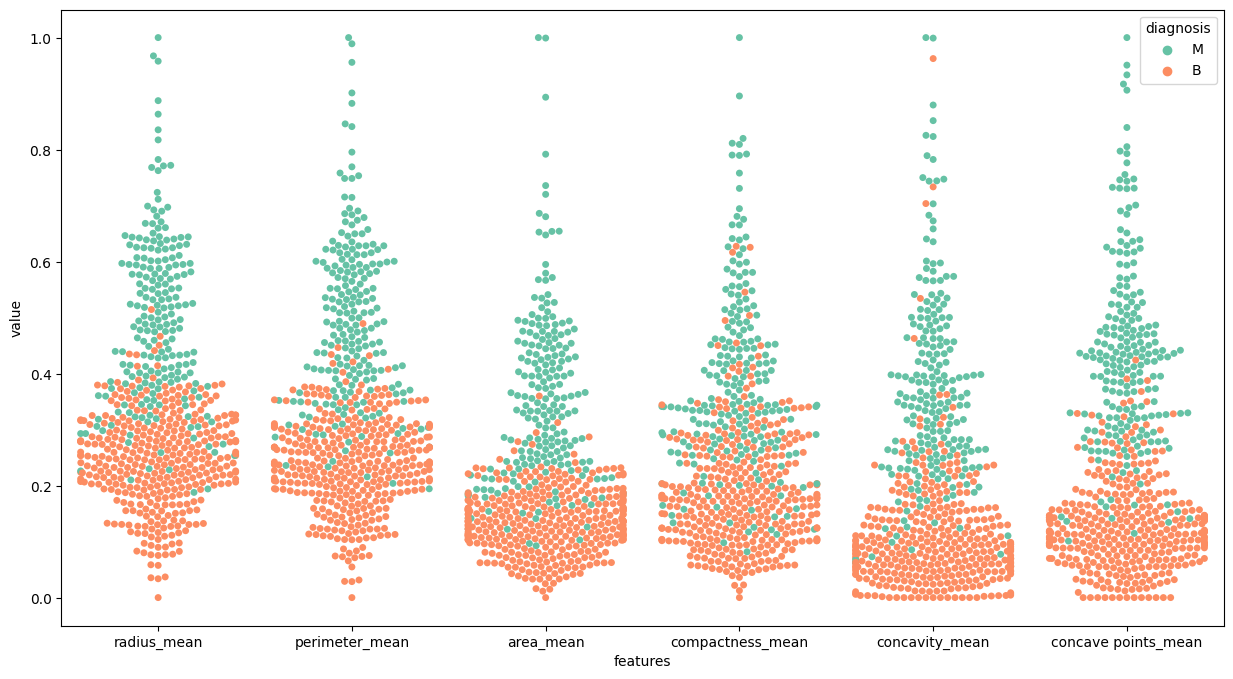

In [90]:
# Biểu đồ Swarm
swarm_data = pd.concat([features_scaled[["radius_mean","perimeter_mean","area_mean",
    "compactness_mean", "concavity_mean", "concave points_mean"]], labels_data], axis=1)

swarm_data = pd.melt(swarm_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))

sns.swarmplot(data=swarm_data, x="features", y="value" ,palette="Set2", hue="diagnosis")

<Axes: xlabel='features', ylabel='value'>

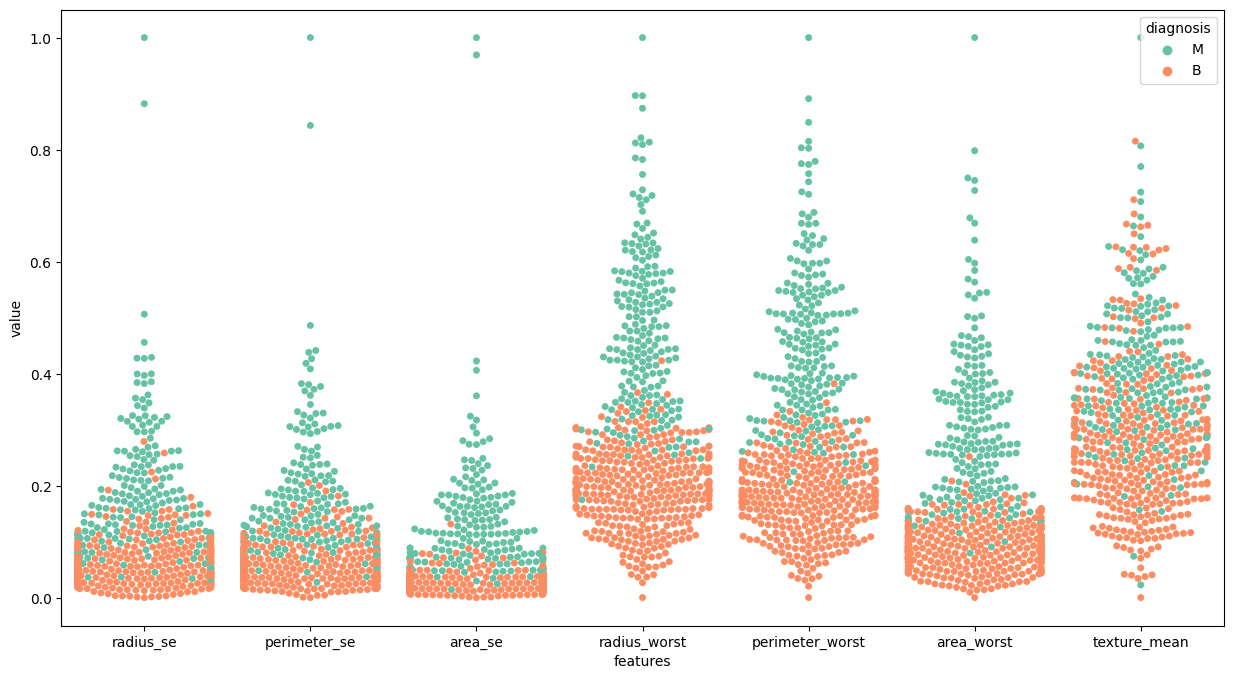

In [91]:
# Biểu đồ Swarm
swarm_data = pd.concat([features_scaled[["radius_se","perimeter_se","area_se", "radius_worst",
    "perimeter_worst", "area_worst", 'texture_mean']], labels_data], axis=1)

swarm_data = pd.melt(swarm_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))

sns.swarmplot(data=swarm_data, x="features", y="value" ,palette="Set2", hue="diagnosis")

<Axes: xlabel='features', ylabel='value'>

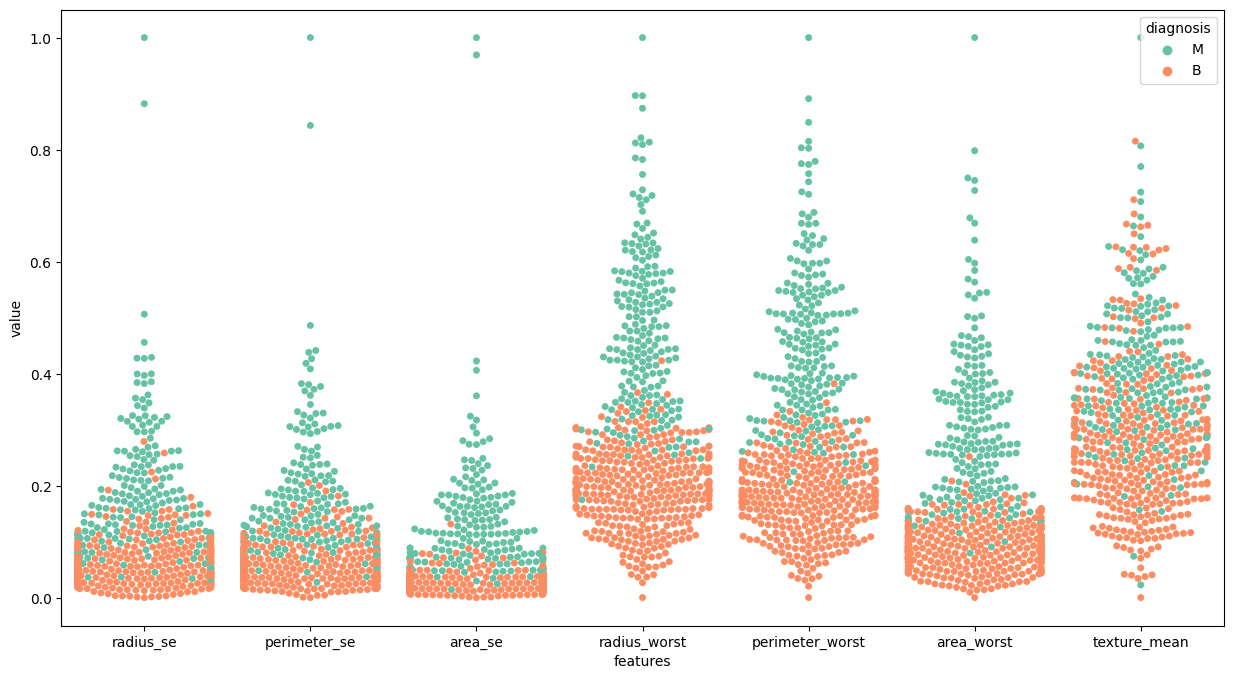

In [92]:
# Biểu đồ Swarm
swarm_data = pd.concat([features_scaled[["radius_se","perimeter_se","area_se", "radius_worst",
    "perimeter_worst", "area_worst", 'texture_mean']], labels_data], axis=1)

swarm_data = pd.melt(swarm_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))

sns.swarmplot(data=swarm_data, x="features", y="value" ,palette="Set2", hue="diagnosis")

**Kết Luận:**
* Từ biểu đồ Heatmap trên, có thể thấy các đặc điểm *radius_mean*, *perimeter_mean*, *area_mean* có *mối tương quan* với nhau, vì vậy có thể sử dụng *area_mean*.

Tương tự,
* *compactness_mean*, *concavity_mean*, *concave points_mean* cũng *tương quan* với nhau, vì vậy có thể sử dụng *concavity_mean*.

* *radius_se*, *perimeter_se* và *area_se* có mối tương quan, do đó, loại bỏ tất cả các đặc điểm ngoại trừ *area_se*.

* *radius_worst*, *perimeter_worst*, *area_worst* và area_worst được chọn cho mục đích phân loại.

* Tôi sử dụng *area_mean* với *texture_mean*, *area_worst*

**Tại sao tôi chỉ chọn một số đặc điểm cụ thể từ các đặc điểm tương quan khác nhau?**
* Từ biểu đồ Swarm trên, có thể thấy rằng *area_mean* là đặc điểm riêng biệt và phân tán rộng, các đặc điểm có cùng tính chất phân phối sẽ không hữu ích cho việc phân loại.
* Với lý do này, chỉ cần sử dụng các đặc điểm cần thiết.

#### **3.2 Tại sao Lựa Chọn Đặc Điểm?**

* Lựa chọn đặc điểm là một kỹ thuật để chọn ra các đặc điểm quan trọng nhất từ một tập dữ liệu.

* Quá trình này giảm số lượng biến đầu vào và do đó giảm sự phức tạp của mô hình.

**Lựa chọn Đặc Điểm cho K-NN**
* Các thuật toán dựa trên khoảng cách như K-NN, K-means và SVM bị ảnh hưởng nhiều bởi phạm vi của các đặc điểm trong tập dữ liệu.

* Những thuật toán này dựa trên độ đo khoảng cách, sử dụng khoảng cách giữa các điểm dữ liệu để xác định độ tương tự. Do đó, các đặc điểm liên quan cung cấp độ chính xác tốt hơn.

In [93]:
# features_updated.columns.to_list()

In [94]:
# Danh sách các đặc điểm tương quan, dự kiến loại bỏ
drop_list = ['perimeter_mean']

# drop_list = ['texture_worst','area_worst']

# Bộ dữ liệu về đặc điểm đã được tỷ lệ lại
features_updated = features_scaled.drop(drop_list,axis = 1)

features_updated.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [95]:
print("Kích thước sau khi loại bỏ các đặc điểm tương quan:", features_updated.shape)

Kích thước sau khi loại bỏ các đặc điểm tương quan: (569, 29)


In [96]:
features_updated.columns.tolist()

['radius_mean',
 'texture_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [97]:
# 3,6,6 

**Lưu ý :** Tập dữ liệu các đặc điểm đã được cập nhật giảm xuống còn 16 đặc điểm từ ban đầu là 30. Việc chỉ xem xét các đặc điểm cần thiết sẽ giúp cải thiện độ chính xác và giảm độ phức tạp của mô hình.

**3.2.1 Phương pháp lựa chọn đặc điểm có đúng không?**

* Các đặc điểm đã được lựa chọn có thể được đánh giá bằng cách sử dụng một `RandomForestClassifier` và các thước đo đánh giá liên quan như `Ma trận nhầm lẫn, Độ chính xác`.

## **4. Quy trình Đào Tạo**

1. Chia tập huấn luyện và thử nghiệm (Train-Test Split)

2. Bộ phân loại K-NN (K-NN Classifier)

3. Các thước đo đánh giá (Evaluation Metrics)

4. Tinh chỉnh Mô hình K-NN - Tối ưu hóa Siêu tham số (Fine-tuning K-NN Model - Hyperparameter Optimization)

#### **4.1 Chia tập Huấn luyện và Thử nghiệm**

* Chia tập dữ liệu thành tập huấn luyện và tập thử nghiệm bằng cách sử dụng `train_test_split` từ mô-đun `sklearn.model_selection`.

* Trong trường hợp này, `kích thước thử nghiệm được đặt là 0.35`=> 35% tập dữ liệu sẽ được sử dụng để kiểm tra hiệu suất mô hình.

In [98]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, 
                                                    test_size=0.35, random_state=42)

#### **4.2 Bộ phân loại K-NN**

* Bộ phân loại K-NN là một thuật toán phân loại sử dụng `khoảng cách giữa` các điểm dữ liệu huấn luyện và các điểm dữ liệu thử nghiệm để xác định những điểm dữ liệu giống nhau nhất.

* Theo mặc định, K-NN sử dụng `Khoảng cách Euclidean` làm độ đo khoảng cách.

**Khoảng cách Euclidean**

* Khoảng cách Euclidean giữa hai điểm được đo bằng công thức dưới đây:

$$d(x,y) = \sqrt{\sum_{i=1}^{n}(y_{i}-x_{i})^2}$$
Trong đó:
- \(d(x, y)\) là khoảng cách Euclidean giữa hai điểm \(x\) và \(y\).
- \(n\) là số chiều trong không gian (số lượng thành phần).
- \(x_i\) và \(y_i\) là các thành phần tương ứng của hai điểm \(x\) và \(y\).
- Sử dụng cho bất kỳ số chiều nào trong không gian nhiều chiều.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/3d-function-2.svg/300px-3d-function-2.svg.png" width="720" height="650" style="margin-left:auto; margin-right:auto"/>

**Hyperparameter trong K-NN**

* Hyperparameters là các `tham số có thể điều chỉnh` có thể điều chỉnh để cải thiện hiệu suất của mô hình.

* Các hyperparameter cần xem xét trong K-NN là `number of neighbors`(số lân cận), `weights` (trọng số), và `distance metric` (thước đo khoảng cách). Tham số có thể điều chỉnh phổ biến và đơn giản nhất là `number of neighbors`(số lân cận).

* Tham số `n_neighbors` được đặt là 5 (*giá trị mặc định*).

* Mô hình K-NN sử dụng `number of neighbors`(số lân cận), `weights` (trọng số), và `distance metric` (thước đo khoảng cách) bằng cách sử dụng GridSearchCV từ mô-đun `sklearn.model_selection`

In [99]:
from sklearn.neighbors import KNeighborsClassifier

## KNN Classifier with K=5 (Ban đầu)
knn = KNeighborsClassifier(n_neighbors=5)

## Fit mô hình
knn.fit(X_train, y_train)

## Dự đoán các giá trị
pred = knn.predict(X_test)

**Thước Đo Đánh Giá:**

Các thước đo đánh giá được nhập từ mô-đun `sklearn.metrics`.

* **Phân Loại:** Được sử dụng để đánh giá chất lượng của dự đoán bởi mô hình phân loại. Hiển thị như: độ chính xác(precision), độ nhớ lại(recall), và điểm F1(f1-score) dựa trên từng lớp(class) hoặc nhãn(label basis).

  * *Độ chính xác (Precision):* Tỷ lệ của các lớp được dự đoán đúng trong tổng số dự đoán cho lớp đó.
  * *Độ nhớ lại (Recall):* Tỷ lệ của các lớp thực tế được dự đoán đúng trong tổng số lớp thực tế của lớp đó.
  * *Điểm F1 (F1-score):* Trung bình điều hòa của độ chính xác và độ nhớ lại.

* **Ma trận nhầm lẫn (Confusion Matrix):** Là một ma trận `N x N` dùng để đánh giá mô hình phân loại. Ma trận này so sánh giá trị thực tế với giá trị dự đoán.
  * *True Positives (TP):* Số lượng dự đoán đúng trong lớp thực tế đó.
  * *True Negatives (TN):* Số lượng dự đoán đúng ngoài lớp thực tế đó.
  * *False Positives (FP):* Số lượng dự đoán sai trong lớp thực tế đó.
  * *False Negatives (FN):* Số lượng dự đoán sai ngoài lớp thực tế đó.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/confusion-matrix.JPG" width="330" height="230" style="margin-left:auto; margin-right:auto"/>

* **Điểm Độ Chính Xác (Accuracy Score):** Nhận giá trị thực tế và giá trị dự đoán làm đầu vào và trả về độ chính xác của mô hình.

* **Điểm Cross Validation (Cross Val Score):** Nhận giá trị đầu vào là tập dữ liệu và cấu hình kiểm tra chéo, sau đó trả về một danh sách các điểm độ chính xác cho mỗi lượt kiểm tra chéo.

  * Mỗi lượt kiểm tra chéo là một tập huấn luyện và thử nghiệm.

<img src="https://www.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1630394319812.jpg" width="700" height="430" style="margin-left:auto; margin-right:auto;">

In [100]:
# Phân Loại và Ma trận nhầm lẫn(Confusion)
from sklearn.metrics import classification_report, confusion_matrix

# Độ chính xác
from sklearn.metrics import accuracy_score

# Điểm đánh giá Cross Validation
from sklearn.model_selection import cross_val_score

In [101]:
# Phân Loại và Ma trận nhầm lẫn
print("Phân Loại\n",classification_report(y_test, pred),
"\n\nMa trận nhầm lẫn(Confusion)\n",confusion_matrix(y_test, pred))

Phân Loại
               precision    recall  f1-score   support

           B       0.98      0.97      0.97       129
           M       0.94      0.96      0.95        71

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200
 

Ma trận nhầm lẫn(Confusion)
 [[125   4]
 [  3  68]]


In [102]:
# Điểm Chính Xác cho Toàn Bộ Dữ Liệu Kiểm Tra
print("Điểm Chính Xác", accuracy_score(y_test, pred))

Điểm Chính Xác 0.965


In [103]:
# Điểm Chính Xác khi chia dữ liệu thành 5 phần              # đào tạo mô hình trên 4 phần và kiểm tra nó trên phần còn lại,
print(cross_val_score(knn, X_train, y_train, cv=5))         #  sau đó lặp lại quy trình 5 lần với các phần khác nhau.

[1.         0.95945946 0.94594595 0.97297297 0.94520548]


#### **Khám phá cách hiệu suất của mô hình biến đổi trên cả dữ liệu huấn luyện và kiểm tra khi bạn thay đổi lượng dữ liệu huấn luyện được sử dụng ?**

Một thử nghiệm đơn giản bằng cách `thay đổi lượng dữ liệu huấn luyện và kiểm tra` và xem xét cách mô hình hoạt động với `neighbors mặc định là 5`.

* Thử nghiệm 1 - Dữ liệu huấn luyện(Train) 67% và dữ liệu kiểm tra(Test) 33%
  
* Thử nghiệm 2 - Dữ liệu huấn luyện(Train) 80% và dữ liệu kiểm tra(Test) 20%
  
* Thử nghiệm 3 - Dữ liệu huấn luyện(Train) 50% và dữ liệu kiểm tra(Test) 50%

**Thử nghiệm 1 - Dữ liệu huấn luyện(Train) 67% và dữ liệu kiểm tra(Test) 33%**

In [104]:
# Dữ liệu huấn luyện(Train) 67% và dữ liệu kiểm tra(Test) 33%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Dự đoán các giá trị
pred = knn.predict(X_test)

print("Thử nghiệm 1 - Dữ liệu huấn luyện 67% và dữ liệu kiểm tra 33%\n\n Phân loại\n",
    classification_report(y_test, pred), "\n\nMa trận nhầm lẫn(Confusion)\n",confusion_matrix(y_test, pred))

print("\nĐiểm chính xác",accuracy_score(y_test, pred))

Thử nghiệm 1 - Dữ liệu huấn luyện 67% và dữ liệu kiểm tra 33%

 Phân loại
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       121
           M       0.96      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188
 

Ma trận nhầm lẫn(Confusion)
 [[118   3]
 [  3  64]]

Điểm chính xác 0.9680851063829787


**Thử nghiệm 2 - Dữ liệu huấn luyện(Train) 80% và dữ liệu kiểm tra(Test) 20%**

In [105]:
# Dữ liệu huấn luyện 80% và dữ liệu kiểm tra 20%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.80, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Dự đoán các giá trị
pred = knn.predict(X_test)

print("Thử nghiệm 2 - Dữ liệu huấn luyện 80% và dữ liệu kiểm tra 20%\n\nPhân loại\n",
    classification_report(y_test, pred), "\n\nMa trận nhầm lẫn(Confusion)\n",confusion_matrix(y_test, pred))

print("\nĐiểm chính xác",accuracy_score(y_test, pred))

Thử nghiệm 2 - Dữ liệu huấn luyện 80% và dữ liệu kiểm tra 20%

Phân loại
               precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

Ma trận nhầm lẫn(Confusion)
 [[69  2]
 [ 2 41]]

Điểm chính xác 0.9649122807017544


**Thử nghiệm 3 - Dữ liệu huấn luyện(Train) 50% và dữ liệu kiểm tra(Test) 50%**

In [106]:
# Dữ liệu huấn luyện 50% và dữ liệu kiểm tra 50%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.50, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Dự đoán các giá trị
pred = knn.predict(X_test)

print("Thử nghiệm 3 - Dữ liệu huấn luyện 50% và dữ liệu kiểm tra 50%\n\nPhân loại\n",
    classification_report(y_test, pred), "\n\nMa trận nhầm lẫn(Confusion)\n",confusion_matrix(y_test, pred))

print("\nĐiểm chính xác",accuracy_score(y_test, pred))

Thử nghiệm 3 - Dữ liệu huấn luyện 50% và dữ liệu kiểm tra 50%

Phân loại
               precision    recall  f1-score   support

           B       0.97      0.97      0.97       187
           M       0.95      0.95      0.95        98

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285
 

Ma trận nhầm lẫn(Confusion)
 [[182   5]
 [  5  93]]

Điểm chính xác 0.9649122807017544


**Kết luận**

Với một *neighbors mặc định là 5*, kết quả của các thử nghiệm trên là như sau:

| Thử nghiệm | Dữ liệu Huấn luyện | Dữ liệu Kiểm tra | Điểm chính xác |
| --- | --- | --- | --- |
| 1 | 67 | 33 | 0.936 |
| 2 | 80 | 20 | 0.929 |
| 3 | 50 | 50 | 0.947 |

* Từ quan sát trên, Có thể thấy rằng `điểm chính xác thay đổi` khi dữ liệu huấn luyện và dữ liệu kiểm tra được biến đổi.

* Theo lý tưởng, `một tỷ lệ nhỏ hơn dữ liệu huấn luyện` sẽ giúp mô hình học tốt hơn. Và một tỷ lệ nhỏ hơn của *dữ liệu kiểm tra* sẽ giúp mô hình đánh giá mô hình.

**Làm thế nào để cấu hình Chia dữ liệu huấn luyện và kiểm tra?**

* Không có phần trăm chia dữ liệu huấn luyện và kiểm tra tốt nhất cho mọi tình huống.

* Việc chia dữ liệu phụ thuộc vào nhiều yếu tố như:
  * Chi phí tính toán trong việc huấn luyện và đánh giá mô hình
  
  * Số lượng lớp trong tập dữ liệu huấn luyện và kiểm tra

**Vậy phương pháp xác nhận tốt là gì?**

* Trong phân loại ung thư vú - KNN, tập dữ liệu *mất cân bằng*. Cụ thể, số lượng mẫu lành tính nhiều hơn nhiều so với số lượng mẫu ác tính.

  * Số lượng lành tính: 357 và Ác tính: 212 [Mục Biểu đồ cột Phần 3]

* Khi dữ liệu được phân chia, có khả năng loại điểm dữ liệu cụ thể có thể được đưa vào tập dữ liệu huấn luyện hoặc thử nghiệm. Điều này dẫn đến các vấn đề như `Overfitting` và `Underfitting`.
* Vì vậy cần phải cân bằng tập dữ liệu. Chia tập dữ liệu sao cho duy trì tỷ lệ mẫu lành tính và ác tính có tỉ lệ bằng nhau(`equal proportion`).
* Được thực hiện bằng phương pháp `Phân chia thử nghiệm đào tạo phân tầng`( `Stratified Train-Test Split`), trong đó tỷ lệ của cả hai nhãn được duy trì như nhau trong phân chia đào tạo và thử nghiệm.

**Phân chia thử nghiệm đào tạo phân tầng(Stratified Train-Test Split)**

In [107]:
# Dữ liệu huấn luyện 67% với Stratified Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67,
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Dự đoán giá trị
pred = knn.predict(X_test)

print("Chia Dữ liệu huấn luyện và kiểm tra theo phương pháp Stratified\n\nPhân loại\n",classification_report(y_test, pred),
    "\n\nMa trận nhầm lẫn(Confusion)\n",confusion_matrix(y_test, pred))

print("\nĐiểm chính xác",accuracy_score(y_test, pred))

Chia Dữ liệu huấn luyện và kiểm tra theo phương pháp Stratified

Phân loại
               precision    recall  f1-score   support

           B       0.95      1.00      0.98       118
           M       1.00      0.91      0.96        70

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188
 

Ma trận nhầm lẫn(Confusion)
 [[118   0]
 [  6  64]]

Điểm chính xác 0.9680851063829787


**Ghi chú:** có thể thấy rằng việc sử dụng `stratified split` của tập dữ liệu đã cải thiện độ chính xác của mô hình phân loại.

* Khi sử dụng *Stratified Split*, mô hình có cơ hội tốt hơn để hiểu về tập dữ liệu, vì mỗi phần tử dữ liệu huấn luyện chứa một `tỷ lệ cân bằng giữa các nhãn` của tập dữ liệu huấn luyện.

#### **4.4 Feintuning mô hình K-NN - Tinh chỉnh siêu tham số**

* Tinh chỉnh siêu tham số là quá trình điều chỉnh các siêu tham số của một mô hình để đạt được hiệu suất tốt nhất có thể.

* Giá trị tối ưu cho các `siêu tham số` giúp *giảm thiểu nhiễu trong phân loại*`(noise on classification)` và *hiện tượng* `(overfitting)` của mô hình
* Tinh chỉnh Siêu tham số được sử dụng hai kỹ thuật:

  * Tìm kiếm Lưới (Grid Search)
  
  * Phương pháp Elbow (Elbow Method)

#### A. Phương pháp Elbow (Elbow Method)

* Trong *Phương pháp Elbow*, giá trị tối ưu của n_neighbors được tìm bằng cách `biến đổi số lượng cụm` từ một phạm vi các giá trị.

* Tính toán `Tổng bình phương bên trong cụm (WCSS)` cho mỗi giá trị của n_neighbors hoặc K.

* WCSS là `tổng bình phương khoảng cách` giữa trọng tâm của một cụm và từng điểm trong cụm. Với biểu đồ, có thể quan sát đường cong giảm đi một giá trị nhất định, tạo ra một "Elbow Method" trong biểu đồ.

* Giá trị tương ứng với `điểm Elbow Method` này là giá trị tối ưu của K.

**Tỷ lệ chính xác so với N_Neighbors(Accuracy Rate vs N_Neighbors)**

In [108]:
accuracy_rate = []

# phạm vi(Range) của n_neighbors cho KNN
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_rate.append(scores.mean())

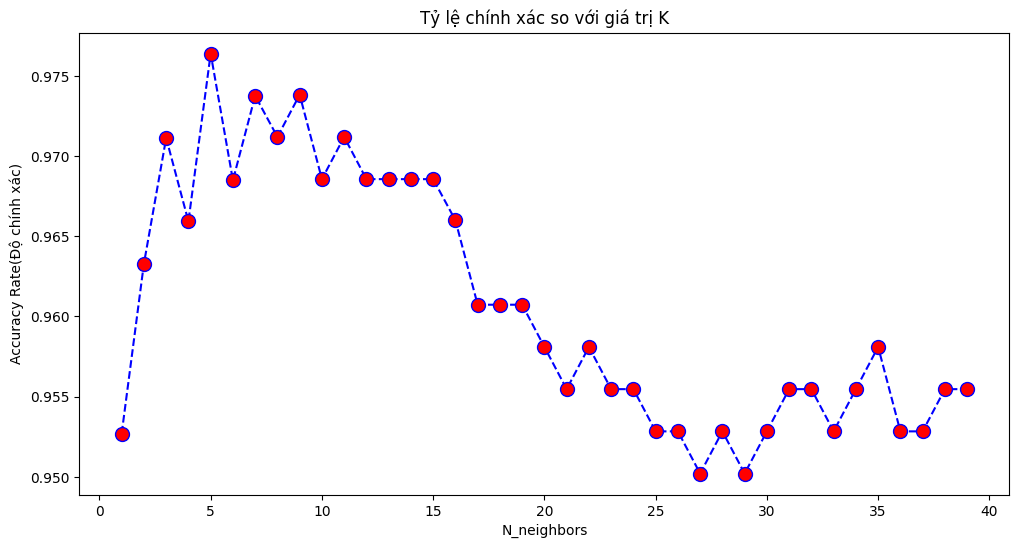

In [109]:
plt.figure(figsize=(12,6))

accuracy_plot = plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)

accuracy_plot = plt.title('Tỷ lệ chính xác so với giá trị K')

accuracy_plot = plt.xlabel('N_neighbors')

accuracy_plot = plt.ylabel('Accuracy Rate(Độ chính xác)')

Từ biểu đồ trên, `Tỷ lệ chính xác (Accuracy Rate)` đang `giảm` đối với các giá trị cao hơn của `N_neighbors`. *giá trị tối ưu* cho n_neighbors từ biểu đồ trên là *11*.

**Tỷ lệ lỗi so với N_Neighbors (Error Rate vs N_Neighbors)**

In [110]:
error_rate = []

# phạm vi(Range) của n_neighbors cho KNN
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    error_rate.append(1 - scores.mean())

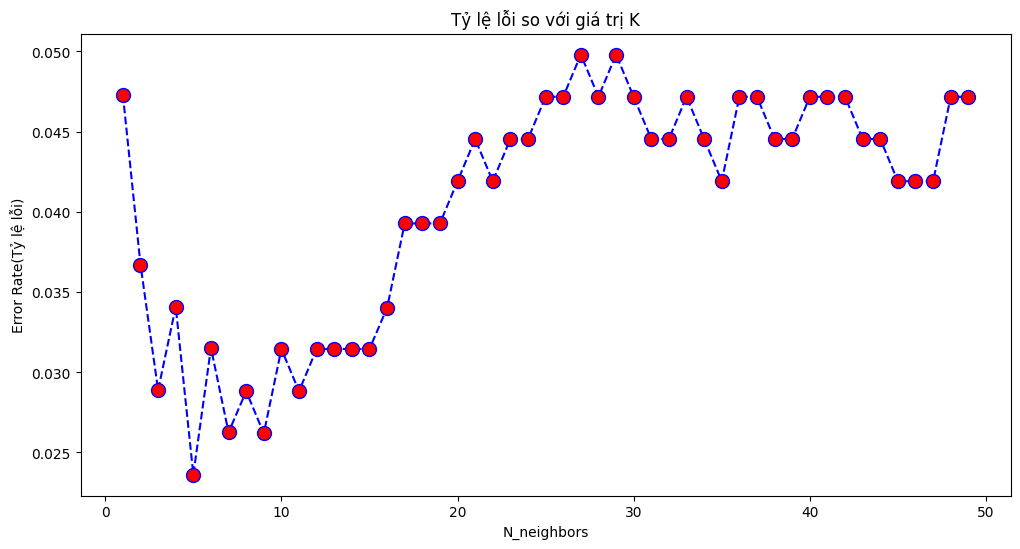

In [111]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Tỷ lệ lỗi so với giá trị K')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate(Tỷ lệ lỗi)')

Từ biểu đồ trên, rõ ràng là `Tỷ lệ lỗi(Error Rate)` đang `tăng` đối với các giá trị cao hơn của `n_neighbors`. *giá trị tối ưu (optimal value)* cho n_neighbors từ biểu đồ trên là *11*.
**phân loại mô hình KNN cho n_neighbors = 11**

In [119]:
# Huấn luyện dữ liệu 67% với Phân chia phân tầng
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67,
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=5)

## Phù hợp với mô hình
knn.fit(X_train, y_train)

## Dự đoán các giá trị
pred = knn.predict(X_test)

print("Phân chia phân tầng giữa Tập Huấn luyện(Train) - Tập Kiểm thử(Test)\n\nPhân loại\n", classification_report(y_test, pred),
    "\n\nMa trận nhầm lẫn(Confusion)\n", confusion_matrix(y_test, pred))

print("\nĐiểm chính xác(Accuracy Score)", accuracy_score(y_test, pred))

Phân chia phân tầng giữa Tập Huấn luyện(Train) - Tập Kiểm thử(Test)

Phân loại
               precision    recall  f1-score   support

           B       0.95      1.00      0.98       118
           M       1.00      0.91      0.96        70

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188
 

Ma trận nhầm lẫn(Confusion)
 [[118   0]
 [  6  64]]

Điểm chính xác(Accuracy Score) 0.9680851063829787


#### **B. Tìm Kiếm Lưới (Grid Search)**

* Lặp qua một lưới hyperparameter đã được xác định trước và trả về mô hình tốt nhất dựa trên dữ liệu xác thực.

* Trong kỹ thuật này, các hyperparameter được `chia thành các điểm lưới rời rạc` và mô hình được huấn luyện trên mỗi điểm lưới đó. Sau đó, mô hình được đánh giá dựa trên các chỉ số hiệu suất.

**Lưu Ý:** Khác với *Phương pháp Elbow (Elbow Method)*, *Tìm kiếm lưới (Grid Search)* có thể được sử dụng để tìm các giá trị tối ưu của nhiều hyperparameter, `không chỉ giới hạn ở giá trị n_neighbors`.

In [113]:
# Tìm Kiếm Lưới từ Thư viện Lựa chọn Mô hình (Model Selection)
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
                70, 75, 80, 85, 90, 95, 100],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Tìm kiếm lưới trên KNN cho 10-fold cross validation
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

Fitting 10 folds for each of 138 candidates, totalling 1380 fits


In [114]:
g_res.best_score_

0.97638326585695

In [115]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [116]:
# Huấn luyện dữ liệu 67% với Phân chia phân tầng
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67,
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='minkowski')

## Phù hợp với mô hình
knn.fit(X_train, y_train)

## ## Dự đoán các giá trị
pred = knn.predict(X_test)

print("Phân chia phân tầng giữa Tập Huấn luyện(Train) - Tập Kiểm thử(Test)\n\nPhân loại\n", classification_report(y_test, pred),
    "\n\nMa trận nhầm lẫn(Confusion)\n", confusion_matrix(y_test, pred))

print("\nĐiểm chính xác(Accuracy Score)", accuracy_score(y_test, pred))

Phân chia phân tầng giữa Tập Huấn luyện(Train) - Tập Kiểm thử(Test)

Phân loại
               precision    recall  f1-score   support

           B       0.96      1.00      0.98       118
           M       1.00      0.93      0.96        70

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188
 

Ma trận nhầm lẫn(Confusion)
 [[118   0]
 [  5  65]]

Điểm chính xác(Accuracy Score) 0.973404255319149


In [117]:
features_updated.describe()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
# import joblib

# model_filename = 'KNN_model.joblib'
# joblib.dump(knn, model_filename)

## **Kết Luận**

* Đối với `Thử nghiệm 2` của Mục C => triển khai thành công `phân loại dựa trên K-NN cho ung thư vú`.

* Breast Cancer dataset (Bộ dữ liệu ung thư vú) là một `Bộ dữ liệu Mất cân bằng` với 357 mẫu lành tính và 212 mẫu ác tính.

* Việc khám phá và trực quan hóa dữ liệu chi tiết được thực hiện `Lựa chọn Đặc trưng`, vì bộ dữ liệu có nhiều *đặc trưng có sự tương quan*.

* Các thử nghiệm dựa trên `kích thước mẫu biến đổi` đã được tiến hành để quan sát sự biến đổi trong hiệu suất của Bộ phân loại.

* Việc `Phân chia Dữ liệu phân tầng` là lựa chọn tối ưu cho bộ dữ liệu mất cân bằng vì nó *tránh các vấn đề* của `Overfitting` và `Underfitting`, bằng cách đảm bảo `tỉ lệ của các nhãn` trong mỗi lượt là bằng nhau. Điều này đã làm tăng độ chính xác của mô hình từ 0.95 lên 0.96.

* `Tối ưu hoá Hyperparameter` đã được thực hiện bằng cách sử dụng *Tìm kiếm lưới* và kỹ thuật *Phương pháp Elbow* để so sánh. Khác với Phương pháp Elbow, `Tìm kiếm lưới` có thể được sử dụng để tìm các giá trị tối ưu của nhiều hyperparameter, `không chỉ giới hạn ở giá trị n_neighbors`.

* Các `Thước đo Đánh giá` có liên quan như Ma trận Nhầm lẫn, Phân loại, Độ chính xác, F1-Score được tính toán cho mô hình K-NN.

